In [94]:
import matplotlib.pyplot as plt
import numpy as np
import fourier_lib as fourier
import pandas as pd
from mlxtend.plotting import heatmap

In [95]:
# array initialize

Fs = 1000          # sampling frequency
Ts = 1/Fs          # time interval between samples
T = 1              # period of harmonic

x_start = 0
x_end = 1
X = np.linspace(x_start, x_end, num=(x_end - x_start)*Fs, endpoint=False)
N_freq = np.array(range(200))       # number of frequency components

F_domain = N_freq/T

Text(1, 0, '(s)')

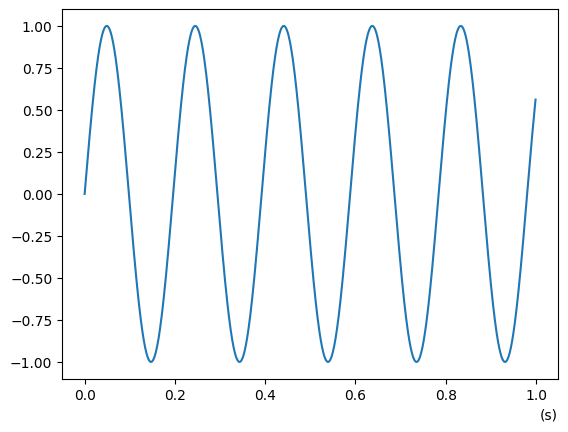

In [96]:
Y = np.sign(np.sin(2*np.pi*5*X))
# Y = Y.reshape(len(Y),1)
Y = np.sin(2*np.pi*5.1*X)

plt.plot(X,Y)
plt.xlabel("(s)",loc="right")

Text(1, 0, '(Hz)')

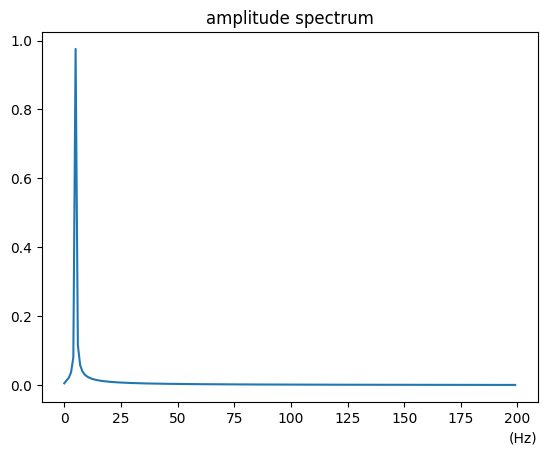

In [97]:
F = fourier.fourier_series_spectrum(X, Y, N_freq, T/2)

plt.plot(F_domain, F)
plt.title("amplitude spectrum")
plt.xlabel("(Hz)", loc='right')

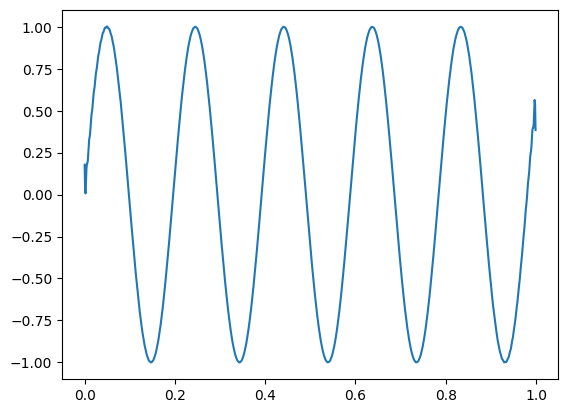

In [98]:
Y_1 = fourier.fourier_series(X, Y, np.arange(200), T/2)

plt.plot(X, Y_1)
plt.show()

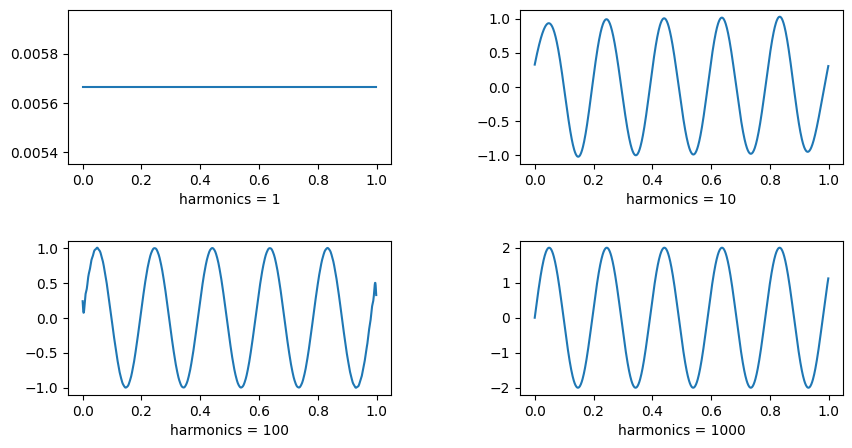

In [99]:
n = np.array([1,10,100,1000])

plt.figure(figsize=(10,5))
for i in range(len(n)):
    Z_z = fourier.fourier_series(X, Y, np.array(range(n[i])), T/2)

    plt.subplot(2,2,(i+1))
    plt.plot(X,Z_z)
    xlabel = 'harmonics = ' + str(n[i])
    plt.xlabel(xlabel)
plt.subplots_adjust(wspace=0.4,hspace=0.5)
plt.show()

Text(0.5, 1.0, 'power spectrum')

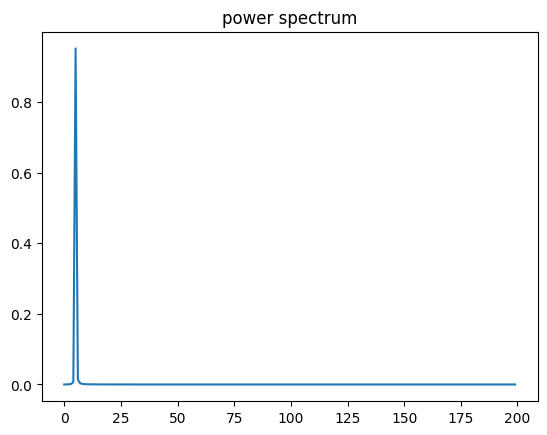

In [100]:
P = fourier.power_spectrum(X, Y, N_freq, T/2)

plt.plot(F_domain, P)
plt.title("power spectrum")

In [101]:
TF = fourier.time_frequency_domain(X, Y, N_freq, T/2)
print(TF.shape)

(200, 1000)


Text(0.5, 0, 'Time')

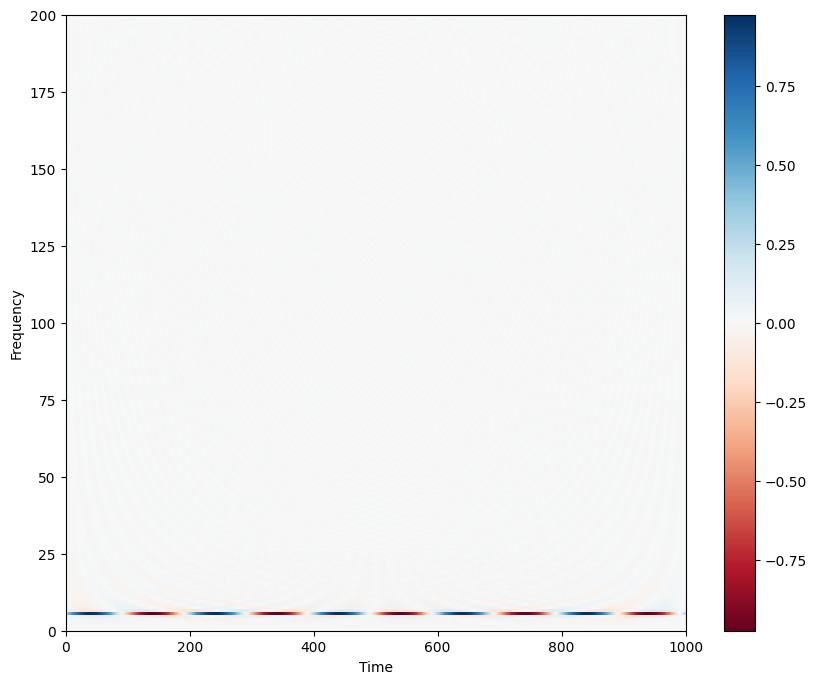

In [102]:
plt.figure(figsize=(10,8))
plt.pcolormesh(TF,cmap='RdBu')
plt.colorbar()
plt.yticks(np.linspace(0,len(N_freq),num=9,dtype='i'),np.linspace(0,len(F_domain),num=9,dtype='i'))
plt.ylabel("Frequency")
plt.xlabel("Time")

## Sample signal test

In [ ]:
df = pd.read_csv("noise.csv")
df.describe()

,heart
count,3600.000000
mean,-6.124739
std,0.352849
min,-7.380000
25%,-6.260000
50%,-6.080000
75%,-5.975000
max,-4.685000


In [ ]:
df_t = np.array(df.index)
df_t = df_t/len(df_t)
df_amp = np.array(df - df.mean())
df_amp = df_amp/len(df_amp)

In [ ]:
df_t

array([0.00000000e+00, 2.77777778e-04, 5.55555556e-04, ...,
       9.99166667e-01, 9.99444444e-01, 9.99722222e-01])

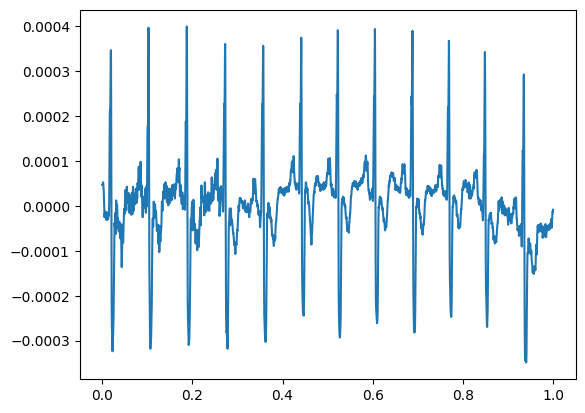

In [ ]:
plt.plot(df_t, df_amp)

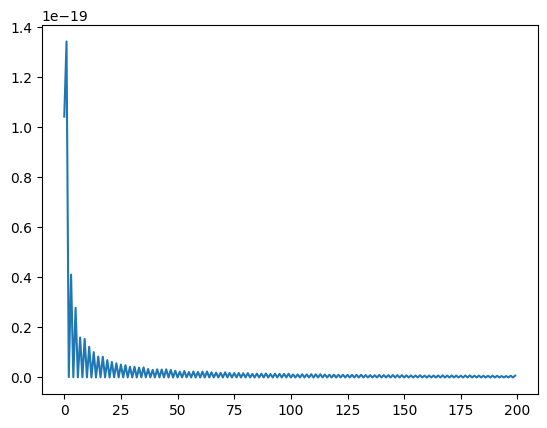

In [ ]:
df_frequency = fourier.fourier_series_spectrum(df_t, df_amp, N_freq, 1)

plt.plot(F_domain,df_frequency)